In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [4]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_rpp_with_mnt_2048.csv"  # os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(
    model_name,
    adapter_name_or_path,
    load_in_4bit,
    data_path,
    results_path,
    use_english_datasets,
    max_new_tokens,
)

microsoft/Phi-3.5-mini-instruct None False datasets/mac/mac.tsv results/mac-results_rpp_with_mnt_2048.csv False 2048


In [5]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils_v2 import *

df = pd.read_csv(results_path)
df.info()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


loading: /Users/inflaton/code/engd/papers/rapget-translation/eval_modules/calc_repetitions_v2d.py
loading /Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils_v2.py


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../../../../.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`
/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Encoder model frozen.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 44 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00              1133 non-null   object
 3   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02              1133 non-null   object
 4   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04              1133 non-null   object
 5   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06              1133 non-null   object
 6   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08              1133 non-null   object
 7   internlm/internlm2_5-7b-chat/checkpoint-14

/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']


In [6]:
result_columns = [col for col in df.columns[2:].to_list() if "Qwen" not in col]
result_columns.sort()
result_columns

['internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.00',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.02',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.04',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.06',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.08',
 'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.10',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.00',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.02',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.04',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.06',
 'shenzhi-wang/Llama3.1-70B-Ch

In [7]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.00',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.02',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.04',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.06',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.08',
  'microsoft/Phi-3.5-mini-instruct/checkpoint-210/rpp-1.10',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.00',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.02',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.04',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.06',
  'shenzhi-wan

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 32 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00              1133 non-null   object
 3   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02              1133 non-null   object
 4   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04              1133 non-null   object
 5   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06              1133 non-null   object
 6   internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08              1133 non-null   object
 7   internlm/internlm2_5-7b-chat/checkpoint-14

In [9]:
metrics_path = results_path.replace(".csv", "_metrics.csv")
metrics_df = pd.read_csv(metrics_path) if os.path.exists(metrics_path) else None
metrics_df.info() if metrics_df is not None else None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   model                     30 non-null     object 
 1   rpp                       30 non-null     float64
 2   comet                     30 non-null     float64
 3   meteor                    30 non-null     float64
 4   spbleu                    30 non-null     float64
 5   bleu_1                    30 non-null     float64
 6   rouge_l                   30 non-null     float64
 7   ews_score                 30 non-null     float64
 8   repetition_score          30 non-null     float64
 9   total_repetitions         30 non-null     float64
 10  nrr                       30 non-null     float64
 11  rap                       30 non-null     float64
 12  translation_completeness  30 non-null     float64
 13  num_max_output_tokens     30 non-null     int64  
dtypes: float64(1

In [10]:
%%time

variant = "rpp"
metrics_df = get_metrics(
    df,
    max_output_tokens=max_new_tokens,
    variant=variant,
    existing_metrics_df=metrics_df,
)
metrics_df

['internlm/internlm2_5-7b-chat', 'microsoft/Phi-3.5-mini-instruct', 'shenzhi-wang/Llama3.1-70B-Chinese-Chat', 'shenzhi-wang/Llama3.1-8B-Chinese-Chat', 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat']


/Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


['internlm/internlm2_5-7b-chat/checkpoint-140', '1.00']
Using existing metrics for internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00
internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00: {'model': 'internlm/internlm2_5-7b-chat', 'rpp': 1.0, 'comet': 0.739699612254078, 'meteor': 0.4289996929258777, 'spbleu': 14.734881589173108, 'bleu_1': 0.1473488158917311, 'rouge_l': 0.4096466800937898, 'ews_score': 0.0626654898499558, 'repetition_score': 12.733451015004412, 'total_repetitions': 12.780229479258605, 'nrr': 0.8953000723065799, 'rap': 0.6661695693100516, 'translation_completeness': 1.0, 'num_max_output_tokens': 2}
['internlm/internlm2_5-7b-chat/checkpoint-140', '1.02']
Using existing metrics for internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02
internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02: {'model': 'internlm/internlm2_5-7b-chat', 'rpp': 1.02, 'comet': 0.740223803961056, 'meteor': 0.4266246904302194, 'spbleu': 14.583816688798017, 'bleu_1': 0.1458381668879802, 'rouge_l': 0.40

model   rpp     comet    meteor  \
0                internlm/internlm2_5-7b-chat  1.00  0.739700  0.429000   
1                internlm/internlm2_5-7b-chat  1.02  0.740224  0.426625   
2                internlm/internlm2_5-7b-chat  1.04  0.739886  0.415459   
3                internlm/internlm2_5-7b-chat  1.06  0.737936  0.403959   
4                internlm/internlm2_5-7b-chat  1.08  0.731999  0.387318   
5                internlm/internlm2_5-7b-chat  1.10  0.729535  0.376931   
6             microsoft/Phi-3.5-mini-instruct  1.00  0.710784  0.379683   
7             microsoft/Phi-3.5-mini-instruct  1.02  0.716477  0.378059   
8             microsoft/Phi-3.5-mini-instruct  1.04  0.711123  0.354716   
9             microsoft/Phi-3.5-mini-instruct  1.06  0.702436  0.329873   
10            microsoft/Phi-3.5-mini-instruct  1.08  0.688211  0.305454   
11            microsoft/Phi-3.5-mini-instruct  1.10  0.671299  0.290383   
12     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  0.750182  0.461111   
13     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  0.748511  0.457152   
14     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  0.750059  0.456047   
15     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  0.748813  0.452042   
16     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.08  0.747385  0.444211   
17     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.10  0.746571  0.437984   
18      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.00  0.742640  0.433633   
19      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.02  0.743648  0.432905   
20      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.04  0.744094  0.432048   
21      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.06  0.742650  0.427543   
22      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.08  0.740810  0.420663   
23      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.10  0.739269  0.411121   
24  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00  0.724024  0.406834   
25  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02  0.726310  0.406491   
26  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04  0.727613  0.405486   
27  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06  0.727687  0.401473   
28  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08  0.726393  0.398702   
29  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10  0.724401  0.393224   

       spbleu    bleu_1   rouge_l  ews_score  repetition_score  \
0   14.734882  0.147349  0.409647   0.053839         12.606355   
1   14.583817  0.145838  0.407173   0.062665          9.849073   
2   13.534659  0.135347  0.396866   0.072374          6.529568   
3   12.346741  0.123467  0.387245   0.067961          6.533981   
4   11.075675  0.110757  0.372435   0.052074          9.834951   
5   10.305164  0.103052  0.363450   0.078553          6.527802   
6    8.712969  0.087130  0.358987  10.670786         17.938217   
7   10.291240  0.102912  0.354695   3.585172          7.140335   
8    8.966882  0.089669  0.330098   3.612533          0.073257   
9    7.076233  0.070762  0.301951   0.045896          0.052074   
10   5.105511  0.051055  0.273603   3.360989          0.064431   
11   4.091959  0.040920  0.251653   0.322154          0.065313   
12  17.879150  0.178791  0.434066   0.007061          0.126214   
13  17.436885  0.174369  0.431139   0.007061          0.115622   
14  17.440173  0.174402  0.430284   0.007061          0.130627   
15  16.895233  0.168952  0.426003   0.007061          0.099735   
16  16.166238  0.161662  0.419513   0.010591          0.130627   
17  15.601723  0.156017  0.413256   0.010591          0.078553   
18  15.209541  0.152095  0.408921   0.003530          3.901147   
19  15.191022  0.151910  0.406897   0.000000          3.890556   
20  15.051352  0.150514  0.406201   0.003530          0.152692   
21  14.449131  0.144491  0.400141   0.007061          0.137688   
22  13.933704  0.139337  0.396482   0.003530          0.129744   
23  13.303738  0.133037  0.387096   0.003530          0.121801   
24  13.565137  0.135651  0.386640   0.052957          0.120918  

In [11]:
metrics_df.to_csv(metrics_path, index=False)
metrics_df.describe()

comet     meteor     spbleu     bleu_1    rouge_l  ews_score  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean    0.730689   0.405204  12.933134   0.129331   0.381955   0.745984   
std     0.018851   0.042128   3.468943   0.034689   0.043790   2.153750   
min     0.671299   0.290383   4.091959   0.040920   0.251653   0.000000   
25%     0.724878   0.388794  11.393441   0.113934   0.372662   0.007061   
50%     0.738602   0.408977  13.482268   0.134823   0.387170   0.052074   
75%     0.743398   0.432691  15.156105   0.151561   0.408484   0.066637   
max     0.750182   0.461111  17.879150   0.178791   0.434066  10.670786   

       repetition_score  total_repetitions        nrr        rap  \
count         30.000000          30.000000  30.000000  30.000000   
mean           3.103030           3.837805   0.969693   0.709672   
std            4.675657           6.078577   0.045440   0.037862   
min            0.052074           0.065313   0.797926   0.580735   
25%            0.116946           0.121801   0.946137   0.688579   
50%            0.132392           0.197264   0.998219   0.721567   
75%            6.454987           6.521183   0.998977   0.741370   
max           17.938217          28.583407   0.999462   0.749444   

       translation_completeness  num_max_output_tokens  
count                 30.000000              30.000000  
mean                   0.999912               0.666667  
std                    0.000269               1.184187  
min                    0.999117               0.000000  
25%                    1.000000               0.000000  
50%                    1.000000               0.000000  
75%                    1.000000               1.000000  
max                    1.000000               6.000000

In [12]:
models = metrics_df["model"].unique()
models

array(['internlm/internlm2_5-7b-chat', 'microsoft/Phi-3.5-mini-instruct',
       'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat'], dtype=object)

In [13]:
# list of markers for plotting
markers = [
    "o",
    "x",
    "^",
    "s",
    "d",
    "P",
    "X",
    "*",
    "v",
    ">",
    "<",
    "p",
    "h",
    "H",
    "+",
    "|",
    "_",
]
markers = {model: marker for model, marker in zip(models, markers)}

In [14]:
model_orders = {
    "microsoft/Phi-3.5-mini-instruct": 5,
    "internlm/internlm2_5-7b-chat": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 30,
    "shenzhi-wang/Llama3.1-8B-Chinese-Chat": 40,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 50,
    "Qwen/Qwen2-72B-Instruct": 60,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [15]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    columns,
    titles,
    log_scales=[False, False],
    sync_y_axis=False,
):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df[variant].unique())
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    if len(columns) > 1:
        twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for x in model_df[variant]]
        for i, column in enumerate(columns):
            current_ax = twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel("Repetition Penalty Parameter (RPP)")
    handles, labels = ax.get_legend_handles_labels()

    if len(columns) > 1:
        handles_twin, labels_twin = twin.get_legend_handles_labels()
        handles += handles_twin
        labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(
        zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]]
    )
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.575 if len(columns) > 1 else -0.35),
    )

    plt.show()

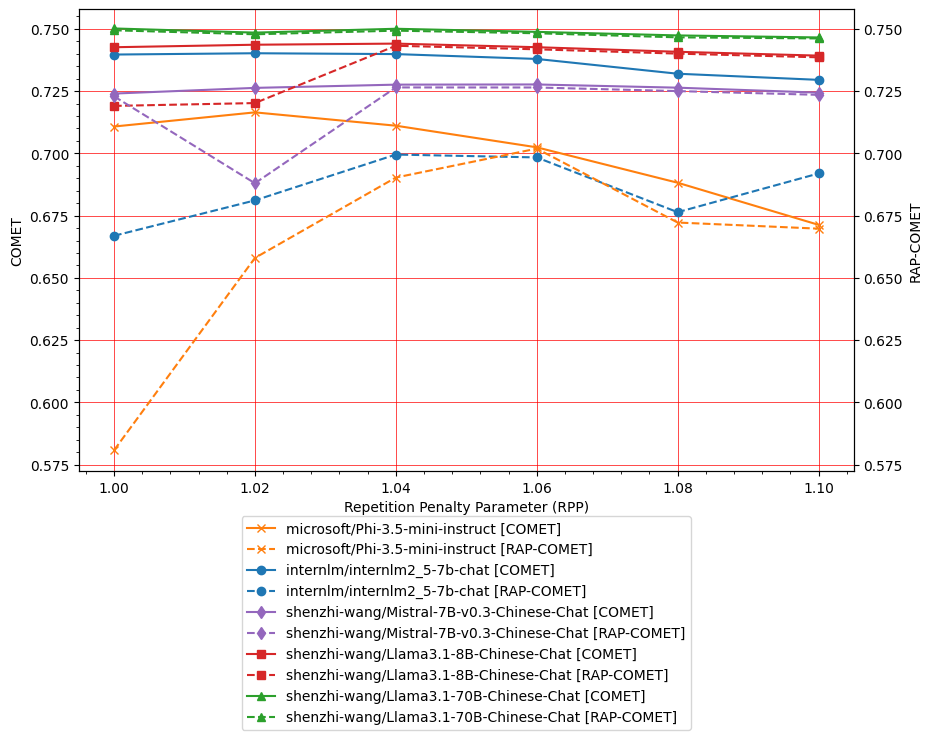

In [16]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["comet", "rap"],
    ["COMET", "RAP-COMET"],
    sync_y_axis=True,
)

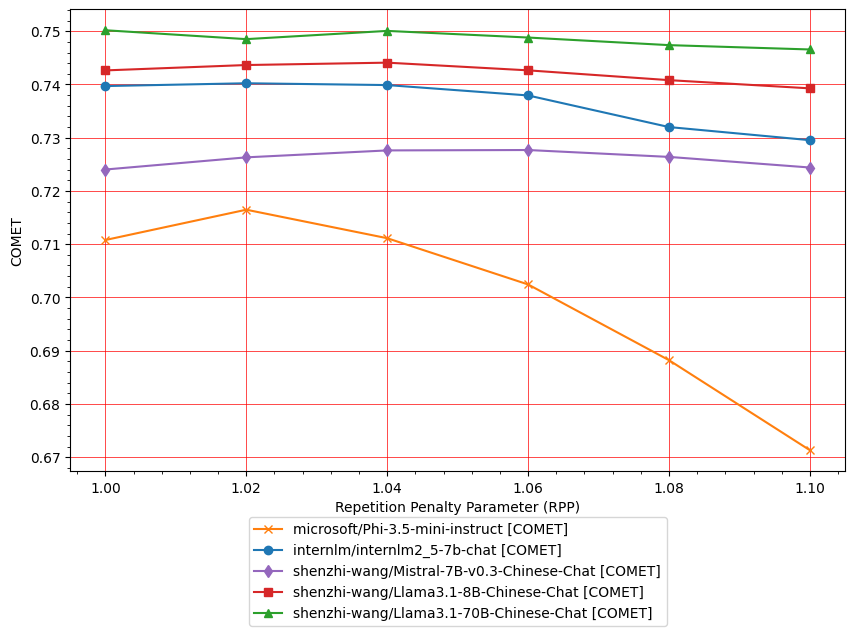

In [17]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["comet"],
    ["COMET"],
)

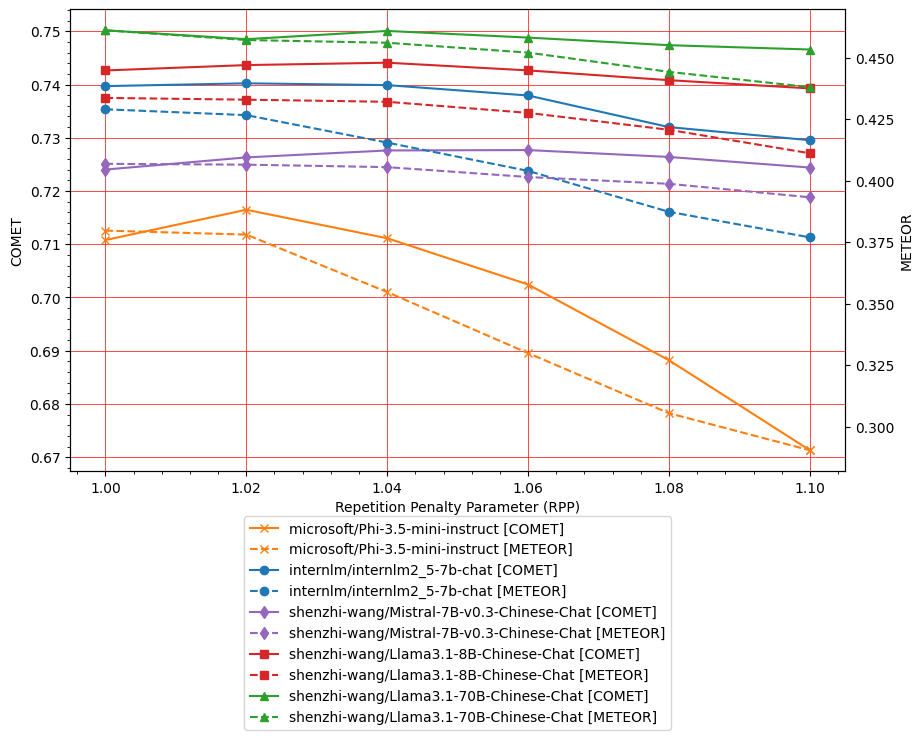

In [18]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["comet", "meteor"],
    ["COMET", "METEOR"],
)

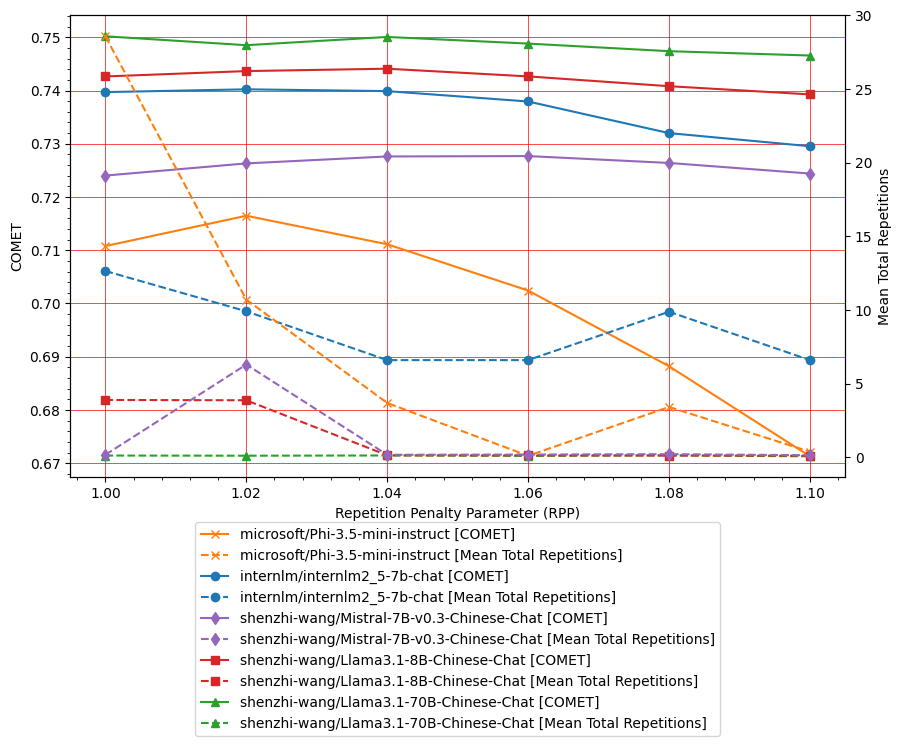

In [19]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["comet", "total_repetitions"],
    ["COMET", "Mean Total Repetitions"],
)

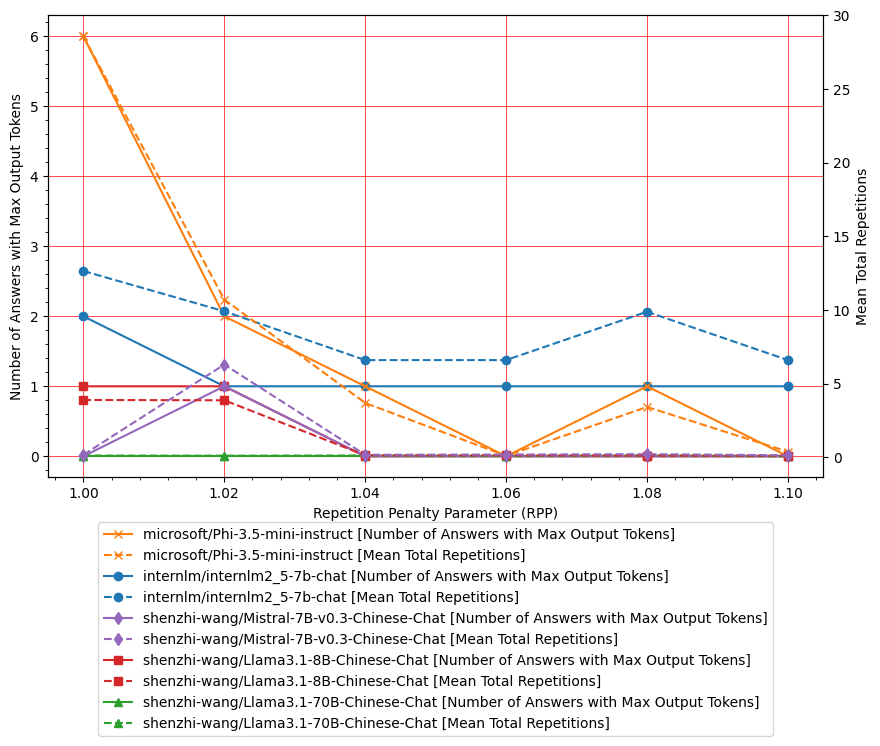

In [20]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["num_max_output_tokens", "total_repetitions"],
    ["Number of Answers with Max Output Tokens", "Mean Total Repetitions"],
)

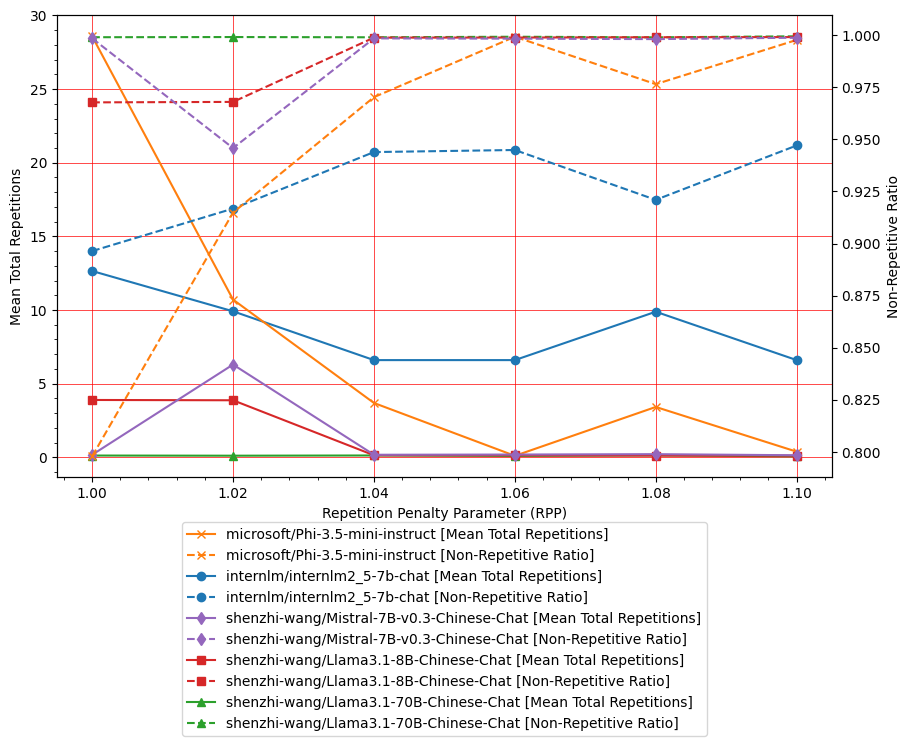

In [21]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["total_repetitions", "nrr"],
    ["Mean Total Repetitions", "Non-Repetitive Ratio"],
)

In [22]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(
        df, col, repetition_threshold=50, max_new_tokens=max_new_tokens
    )

### Analyzing: internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00
*** Found 2 rows with total_repetitions > 50 for internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00
短长长长长、短长长长长、短短短短短、长长长短短、长长短短长长、短短长长长、短短短短长、长长短短长长、短短短长长、长长短短短，这是1108：21：37。
short-long-long-long-long, short-long-long-long-long, long-long-long-long-long, long-long-long-short-short, long-long-long-short-short-short, short-short-long-long-long, short-long-long-long-long, long-long-long-short-short-short, short-short-short-long-long, long-long-short-short-short. That's 1108:21:37, Wang thought.
Short, long, long, long, short, long, long, long, short, long, long, long, short, long, long, long, short, long, long, short, short, long, long, long, long, short, long, long, long, short, long, long, long, short, long, long, short, short, long, long, long, short, long, long, long, short, long, long, long, short, long, long, long, short, long, long, long, short, long, long, long, short, long, long, long, short, long, long, long,